# importing libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import lazypredict
from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

# EDA


In [28]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df.shape

(10000, 12)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [31]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [32]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [33]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [34]:
fig = px.histogram(df, x="churn",color="churn")
fig.update_layout(bargap=0.7)
fig.show()


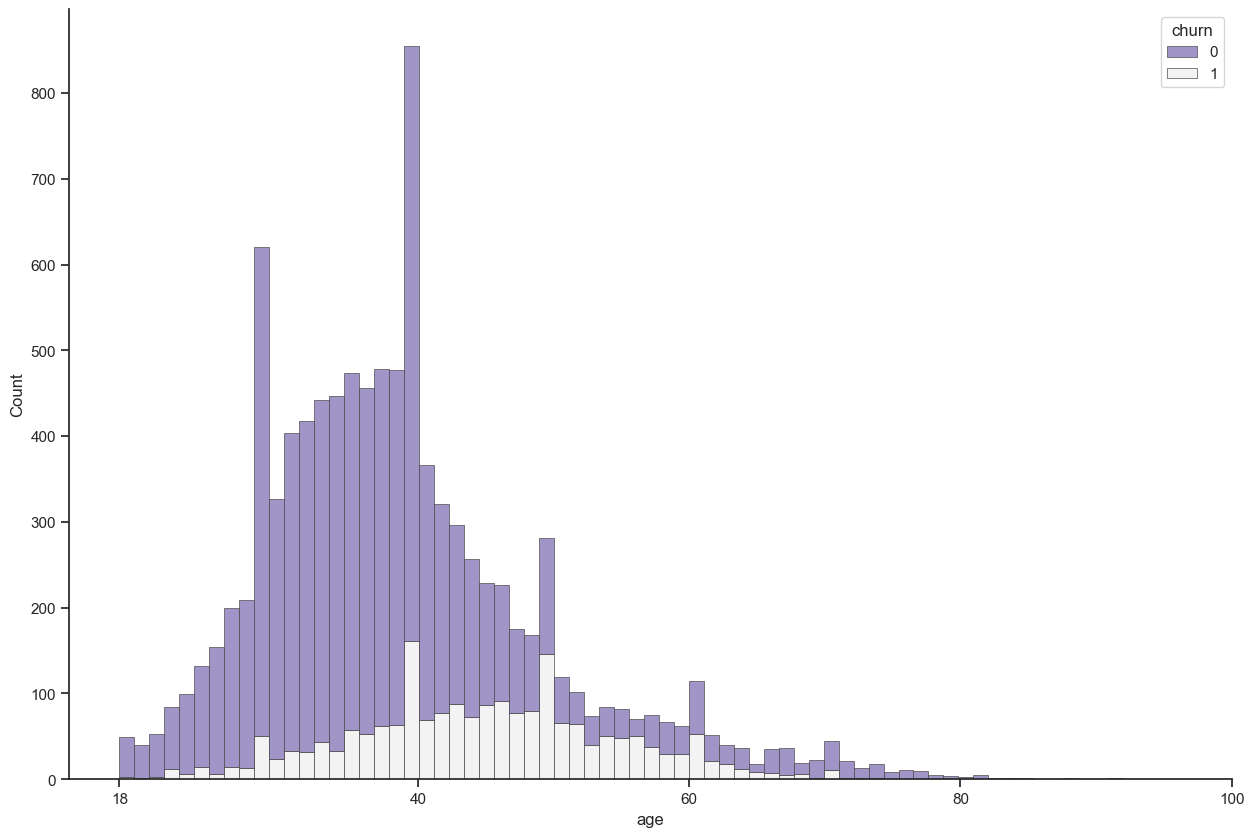

In [35]:
import matplotlib as mpl
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(15,10))
sns.despine(f)

sns.histplot(df,x="age", hue="churn",multiple="stack",palette="light:m_r",edgecolor=".3",linewidth=.5)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([18, 40, 60, 80, 100])

### the most of customers are churn when thier ages are between 38 to 50 years old
### the most of customers are non-churn and have accounts in the bank that thier ages are between 25 to 40 years old

In [36]:
px.histogram(df,x='active_member', color = 'churn',barmode = 'group')

### the possibility that customers are churn when they are not active_member and vice versa

In [37]:
px.histogram(df,x='country', color = 'churn',barmode = 'group')

### the bigest numbers of churn customers are in germany .
### the smallest numbers of churn customers are in spain .

In [38]:
px.histogram(df,x='credit_card', color = 'churn',barmode = 'group')

### the possibility that customers are churn when they have a credit card of that Bank. and vice versa.
### May be because credit card influences your spending habits in a negative way

In [39]:
px.histogram(df,x='gender', color = 'churn',barmode = 'group')

### the bigest numbers of churn customers are Female 

In [40]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


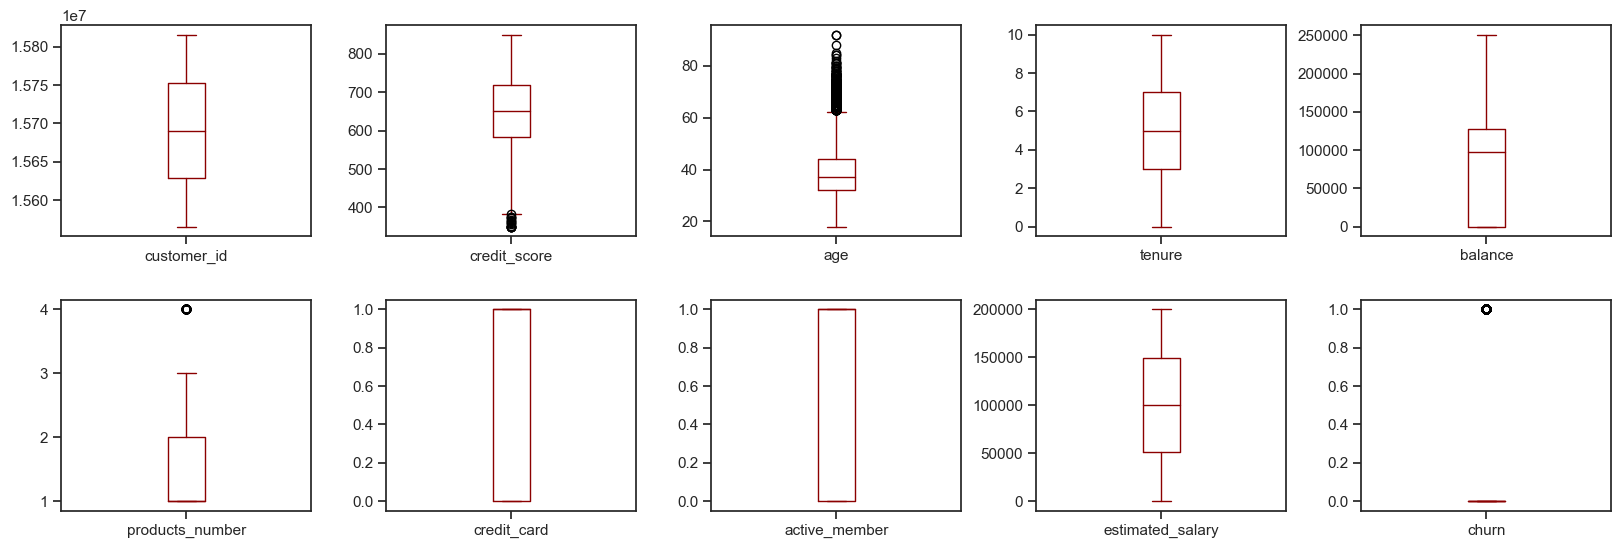

In [41]:
df.plot(subplots =True, kind = 'box', layout = (5,5), figsize = (20,17), color = 'DarkRed')
plt.subplots_adjust(wspace = 0.3, hspace= 0.3)

### here we have not a lot of outliers that may be infulence on modeling

<AxesSubplot:>

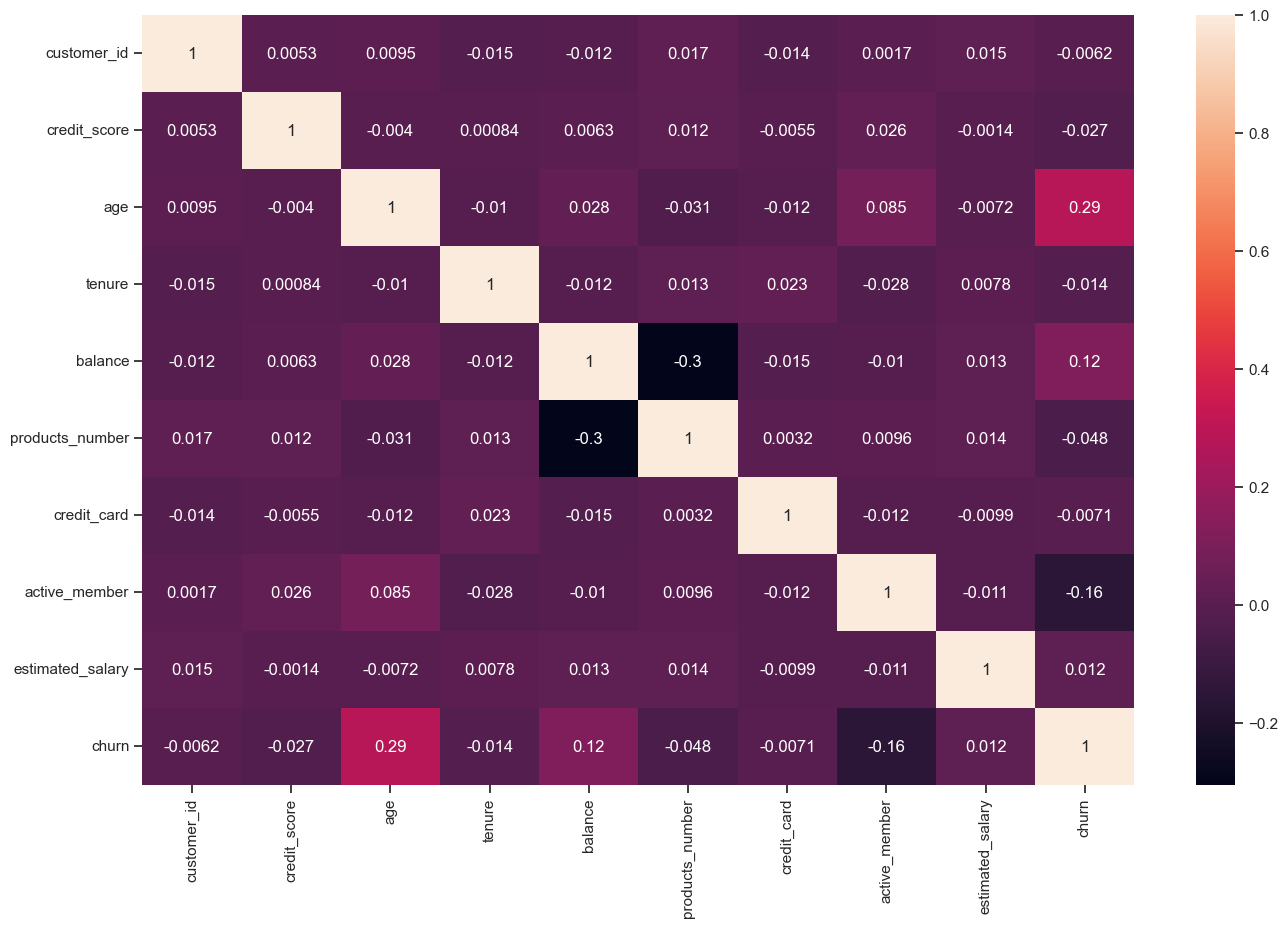

In [42]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cbar = True , annot=True)

# Preprocesssing :
### here we have imbalance data problem and to solve that we have two techniques "oversampling" and "undersampling" and let is try and apply the best

In [43]:
#we need to encoding gender and country  column we used label encoding 
df['country'] = LabelEncoder().fit_transform(df['country'])
df['gender'] = LabelEncoder().fit_transform(df['gender'])
## customer-id is not useful so i drop it
df=df.drop('customer_id',axis=1)

In [44]:
x= df.copy();
x.drop('churn',axis = 1,inplace = True)
y = df['churn']

In [45]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=123)
x_res , y_res = smk.fit_resample(x,y)
SMOTETomek=(x_res , y_res)

In [46]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=123)
x_res , y_res = smk.fit_resample(x,y)

train_score : 0.6729108127796857
test_score : 0.6720077688759407
              precision    recall  f1-score   support

   Non churn       0.69      0.64      0.66      2069
       churn       0.66      0.71      0.68      2050

    accuracy                           0.67      4119
   macro avg       0.67      0.67      0.67      4119
weighted avg       0.67      0.67      0.67      4119



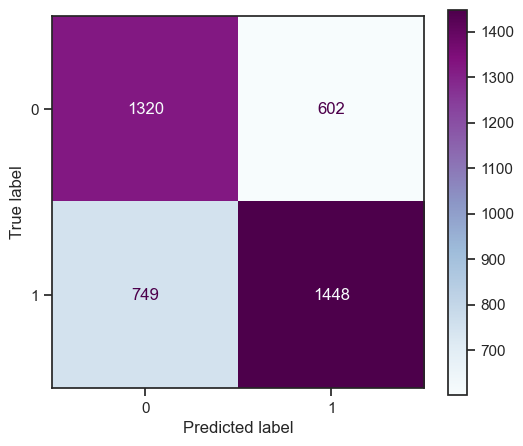

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size=0.3,random_state = 1234)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report   
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = LogisticRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)

train_score=model.score(x_train , y_train)
test_score=model.score(x_test , y_test)

print("train_score :",train_score)
print("test_score :",test_score)

print(classification_report(y_test, y_pred,target_names=['Non churn','churn']))
confusion_matrix=confusion_matrix(y_pred,y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
fig, ax = plt.subplots(figsize=(6,5))
ax.grid(False)
cm_display.plot(ax=ax,cmap='BuPu')
plt.show()

In [51]:
from imblearn.under_sampling import RandomUnderSampler 
ous = RandomUnderSampler(random_state=42)
x_res,y_res = ous.fit_resample(x,y)
RandomunderSampler=(x_res,y_res )

train_score : 0.6552086987022098
test_score : 0.6663941128372853
              precision    recall  f1-score   support

   Non churn       0.66      0.67      0.66       602
       churn       0.67      0.66      0.67       621

    accuracy                           0.67      1223
   macro avg       0.67      0.67      0.67      1223
weighted avg       0.67      0.67      0.67      1223



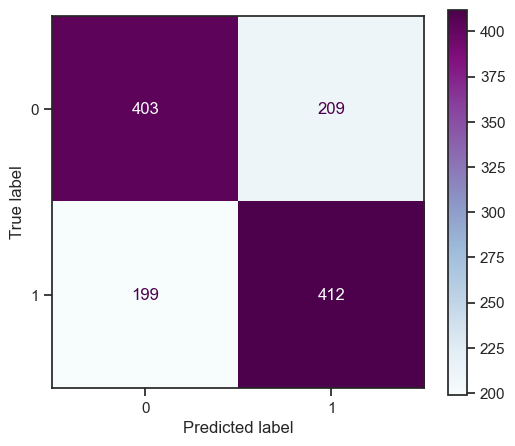

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size=0.3,random_state = 1234)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report   
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = LogisticRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)

train_score=model.score(x_train , y_train)
test_score=model.score(x_test , y_test)

print("train_score :",train_score)
print("test_score :",test_score)

print(classification_report(y_test, y_pred,target_names=['Non churn','churn']))
confusion_matrix=confusion_matrix(y_pred,y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
fig, ax = plt.subplots(figsize=(6,5))
ax.grid(False)
cm_display.plot(ax=ax,cmap='BuPu')
plt.show()

### the accuracy for train random under sampler is 65% and for SMOTE is 67%  may be i will use SMOTE technique

# MODEL BUILDING

In [53]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=123)
x_res , y_res = smk.fit_resample(x,y)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2,random_state=0)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [55]:
clf = LazyClassifier( ignore_warnings=True, custom_metric = None,classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:20<00:00,  1.43it/s]


In [56]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.86               0.86     0.86      0.86   
XGBClassifier                      0.86               0.86     0.86      0.86   
LGBMClassifier                     0.86               0.86     0.86      0.86   
ExtraTreesClassifier               0.86               0.86     0.86      0.86   
BaggingClassifier                  0.84               0.84     0.84      0.84   
SVC                                0.83               0.83     0.83      0.83   
LabelSpreading                     0.83               0.82     0.82      0.83   
LabelPropagation                   0.83               0.82     0.82      0.82   
AdaBoostClassifier                 0.82               0.82     0.82      0.82   
NuSVC                              0.82               0.82     0.82      0.82   
KNeighborsClassifier        

In [62]:
models.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Model'})

line.show()

In [60]:
models.sort_values(by = 'Time Taken',inplace = True,ascending = False)
line = px.line(data_frame= models ,y =["Time Taken"] , markers = True)
line.update_xaxes(title="Model")
line.update_yaxes(title = "Time Taken")
line.update_traces(line_color="blue")
line.update_layout(showlegend = True,
    title = {
        'text': 'Time Taken Vs Model'})

line.show()

# by using lazy classifier we come to conclusion that randam forest is performing better 

test_score : 0.8591891235736829
              precision    recall  f1-score   support

   Non churn       0.86      0.85      0.86      2069
       churn       0.85      0.87      0.86      2050

    accuracy                           0.86      4119
   macro avg       0.86      0.86      0.86      4119
weighted avg       0.86      0.86      0.86      4119



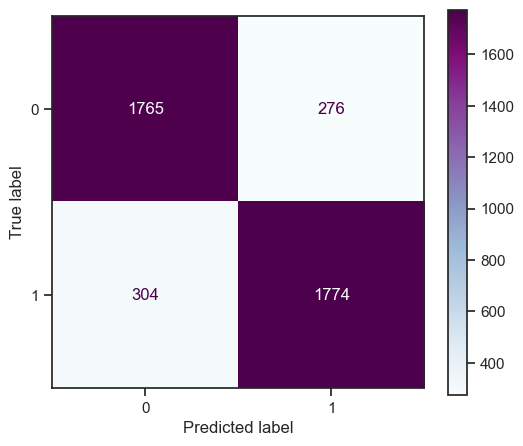

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size=0.3,random_state = 1234)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report   
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = RandomForestClassifier().fit(x_train,y_train)
y_pred = model.predict(x_test)


test_score=model.score(x_test , y_test)

print("test_score :",test_score)

print(classification_report(y_test, y_pred,target_names=['Non churn','churn']))
confusion_matrix=confusion_matrix(y_pred,y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
fig, ax = plt.subplots(figsize=(6,5))
ax.grid(False)
cm_display.plot(ax=ax,cmap='BuPu')
plt.show()